In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [45]:
from pandas.plotting import scatter_matrix
import math

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
#Load data
description = pd.read_csv('/Users/hinatran/Downloads/dseb-64-data-preparation-final-project/dseb63_columns_description.csv', encoding = 'Latin-1')

In [48]:
installments_payments = pd.read_csv('/Users/hinatran/Downloads/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_installments_payments.csv')
installments_payments

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0
...,...,...,...,...,...,...,...,...
7744753,2192667,1.0,6,-2352.0,-2352.0,5322.240,5322.240,21216.0
7744754,2208281,1.0,4,-452.0,-466.0,63195.435,63195.435,21216.0
7744755,2657771,0.0,3,-2907.0,-2932.0,3375.000,3375.000,21216.0
7744756,2657771,0.0,47,-1871.0,-1871.0,4915.890,4915.890,21216.0


# EDA

## Description of each column

In [49]:
for col in installments_payments.columns:
    
    name = ''.join(description[description['Row'] == col]['Description'].values)
    
    print(f'{col}: {name} ')

SK_ID_PREV:  
NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed 
NUM_INSTALMENT_NUMBER: On which installment we observe payment 
DAYS_INSTALMENT: When the installment of previous credit was supposed to be paid (relative to application date of current loan) 
DAYS_ENTRY_PAYMENT: When was the installments of previous credit paid actually (relative to application date of current loan) 
AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment 
AMT_PAYMENT: What the client actually paid on previous credit on this installment 
SK_ID_CURR: ID of loan in our sampleID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau ID of loan in our sampleID of loan in our sampleID of loan in our sampleID of loan in our sample 


## Overall stats

In [50]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744758 entries, 0 to 7744757
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
 7   SK_ID_CURR              float64
dtypes: float64(6), int64(2)
memory usage: 472.7 MB


In [51]:
installments_payments.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0


In [52]:
installments_payments.describe()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
count,7.744758e+06,7.744758e+06,7.744758e+06,7.744758e+06,7.743119e+06,7.744757e+06,7.743119e+06,7.744757e+06
mean,1.902824e+06,8.254635e-01,1.991675e+01,-1.055681e+03,-1.064303e+03,1.672476e+04,1.685389e+04,1.535739e+05
std,5.360570e+05,9.774997e-01,2.763188e+01,8.009713e+02,8.006232e+02,4.997746e+04,5.407602e+04,8.864267e+04
min,1.000001e+06,0.000000e+00,1.000000e+00,-2.922000e+03,-3.160000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.432108e+06,0.000000e+00,4.000000e+00,-1.677000e+03,-1.686000e+03,4.050000e+03,3.375000e+03,7.684800e+04
50%,1.895642e+06,1.000000e+00,9.000000e+00,-8.420000e+02,-8.510000e+02,8.611920e+03,7.906185e+03,1.530760e+05
75%,2.368895e+06,1.000000e+00,2.100000e+01,-3.690000e+02,-3.790000e+02,1.641312e+04,1.575000e+04,2.301440e+05
max,2.843495e+06,1.780000e+02,2.750000e+02,-2.000000e+00,-2.000000e+00,3.771488e+06,3.771488e+06,3.075080e+05


First look, we dont see any anomalies in this dataset

## Correct names and data types of columns

In [53]:
installments_payments.columns

Index(['SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT', 'SK_ID_CURR'],
      dtype='object')

In [54]:
def snake_case_columns(columns):
    return [col.strip().replace(" ", "_") for col in columns]

installments_payments.columns = snake_case_columns(installments_payments.columns)

installments_payments.rename(columns={'NUM_INSTALMENT_VERSION': 'NUM_INSTALLMENT_VERSION',
                   'NUM_INSTALLMENT_NUMBER':'NUM_INSTALLMENT_NUMBER',
                   'DAYS_INSTALMENT': 'DAYS_INSTALLMENT',
                   'AMT_INSTALMENT': 'AMT_INSTALLMENT'}, inplace=True)

In [55]:
installments_payments['NUM_INSTALLMENT_VERSION'] = installments_payments['NUM_INSTALLMENT_VERSION'].astype('Int64')

In [56]:
# Check values in categorical column
for col in installments_payments.columns:
    if installments_payments[col].dtype == 'object':
        print(f"{col}: {installments_payments[col].value_counts()}")

## Distribution of each numeric columns

array([[<Axes: title={'center': 'SK_ID_PREV'}>,
        <Axes: title={'center': 'NUM_INSTALLMENT_VERSION'}>,
        <Axes: title={'center': 'NUM_INSTALMENT_NUMBER'}>],
       [<Axes: title={'center': 'DAYS_INSTALLMENT'}>,
        <Axes: title={'center': 'DAYS_ENTRY_PAYMENT'}>,
        <Axes: title={'center': 'AMT_INSTALLMENT'}>],
       [<Axes: title={'center': 'AMT_PAYMENT'}>,
        <Axes: title={'center': 'SK_ID_CURR'}>, <Axes: >]], dtype=object)

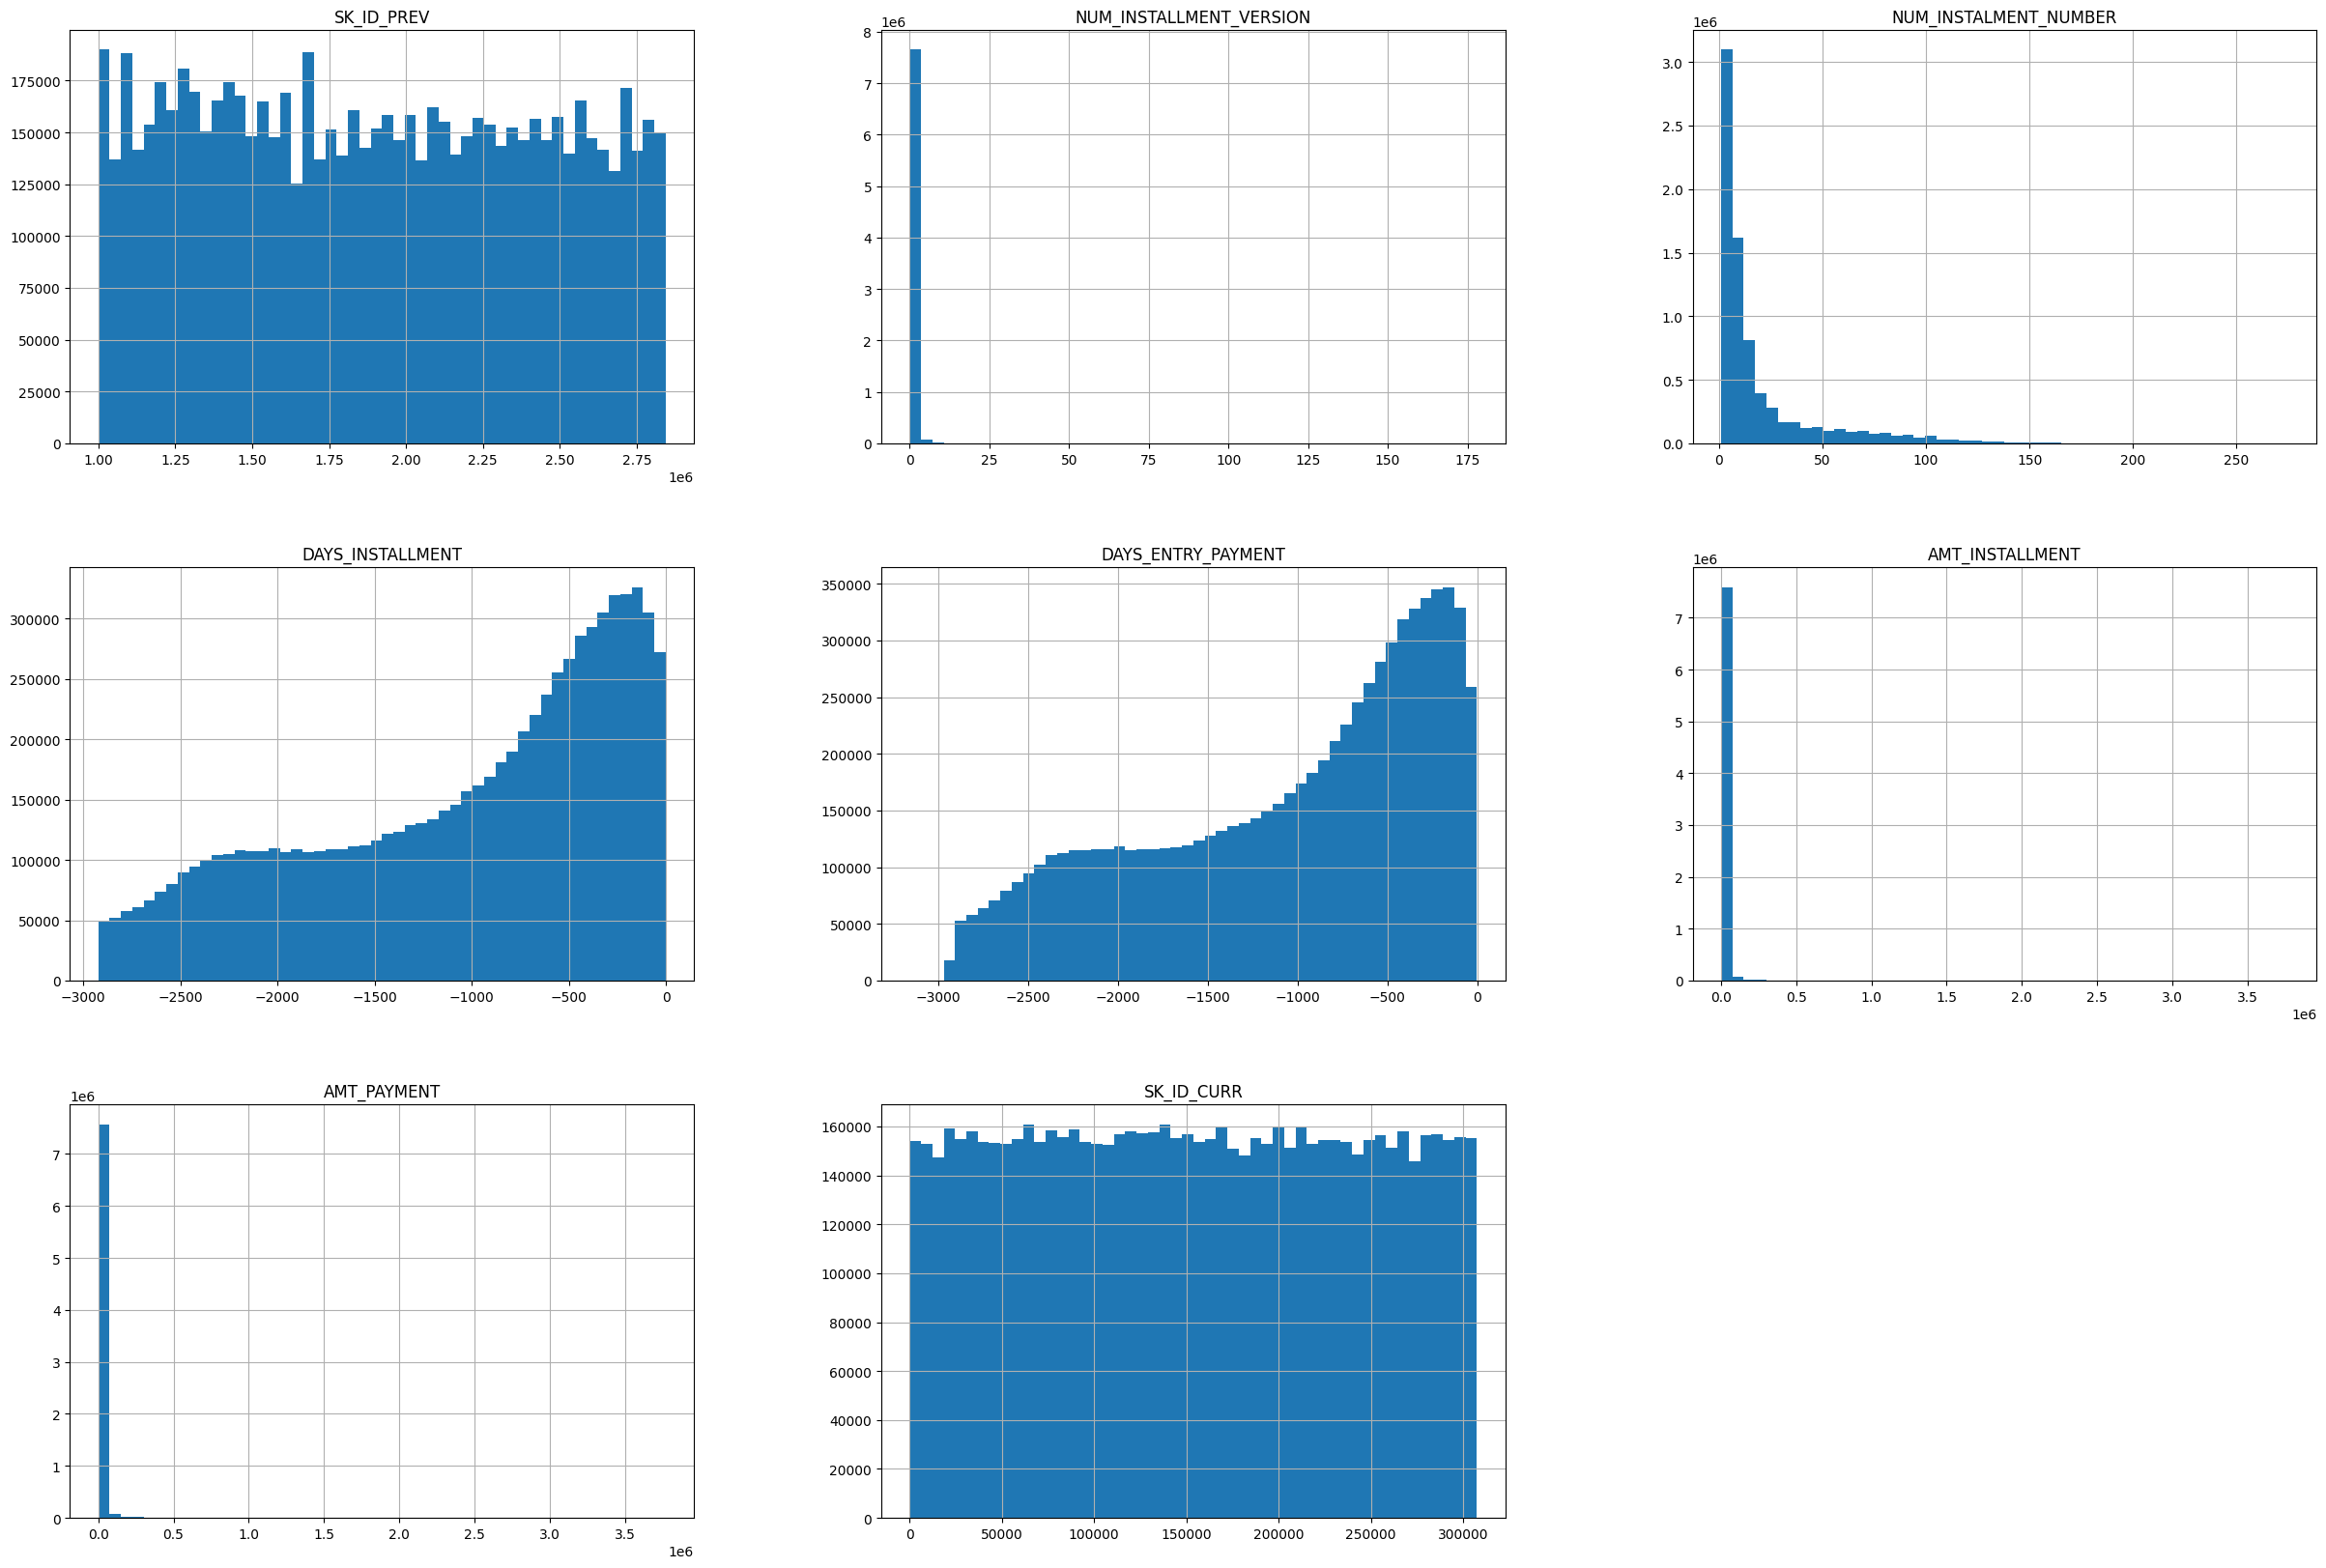

In [57]:
# Check distribution of each columns with numeric values
installments_payments.hist(bins = 50, figsize = (30, 20))

## Correlation

Các cặp cột có tương quan cao:
            column_1            column_2  correlation
28  DAYS_INSTALLMENT  DAYS_ENTRY_PAYMENT     0.999488
46   AMT_INSTALLMENT         AMT_PAYMENT     0.937035


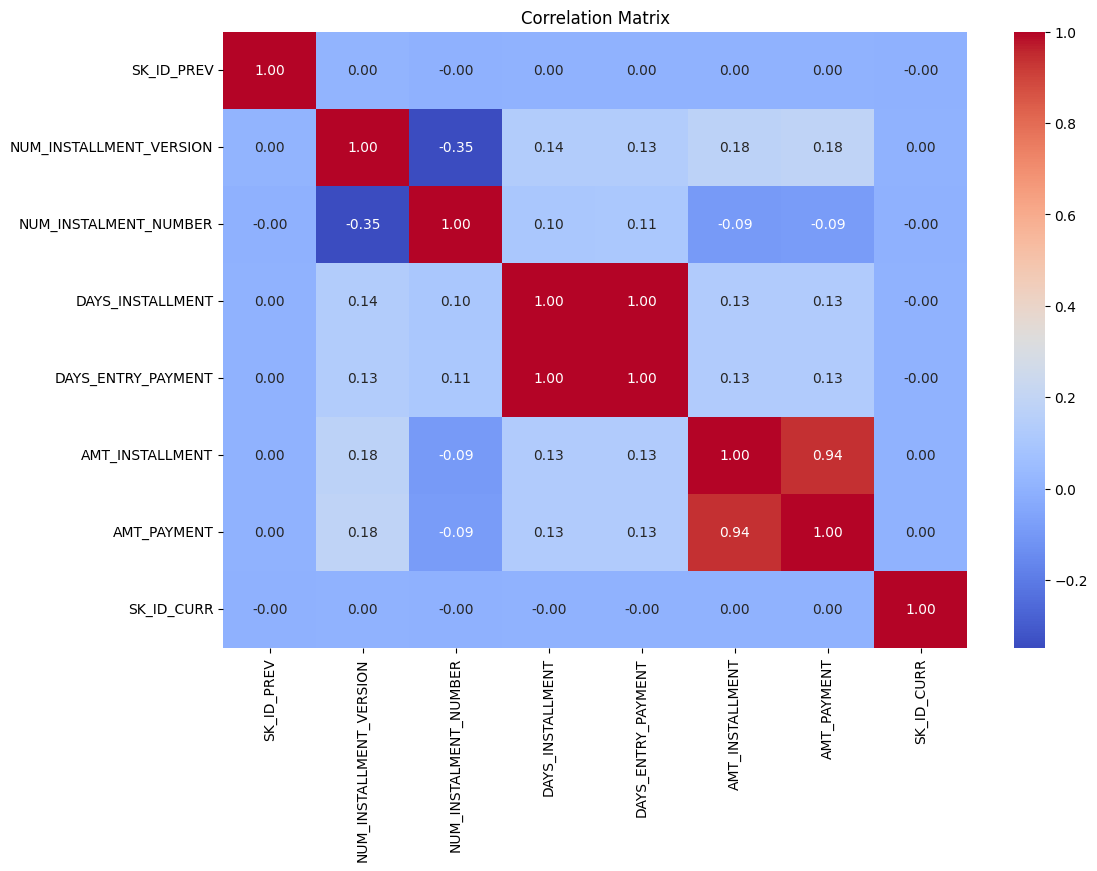

In [58]:
# Chọn các cột số
numeric_columns = installments_payments.select_dtypes(include=['float64', 'int64','Int64']).columns

# Tính ma trận tương quan
correlation_matrix = installments_payments[numeric_columns].corr()

# Lọc các cặp có tương quan cao
threshold = 0.5  # Ngưỡng tương quan (ví dụ: 0.7)
correlated_pairs = (
    correlation_matrix
    .unstack()
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "column_1", "level_1": "column_2"})
)

# Loại bỏ các cặp trùng lặp (mỗi cặp chỉ hiện một lần)
correlated_pairs = correlated_pairs[
    (correlated_pairs['column_1'] != correlated_pairs['column_2']) & 
    (correlated_pairs['correlation'].abs() > threshold)
].drop_duplicates(subset=['correlation'])

# In ra danh sách cặp tương quan cao
print("Các cặp cột có tương quan cao:")
print(correlated_pairs.sort_values(by="correlation", ascending=False))

# Hiển thị heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Remove outliers

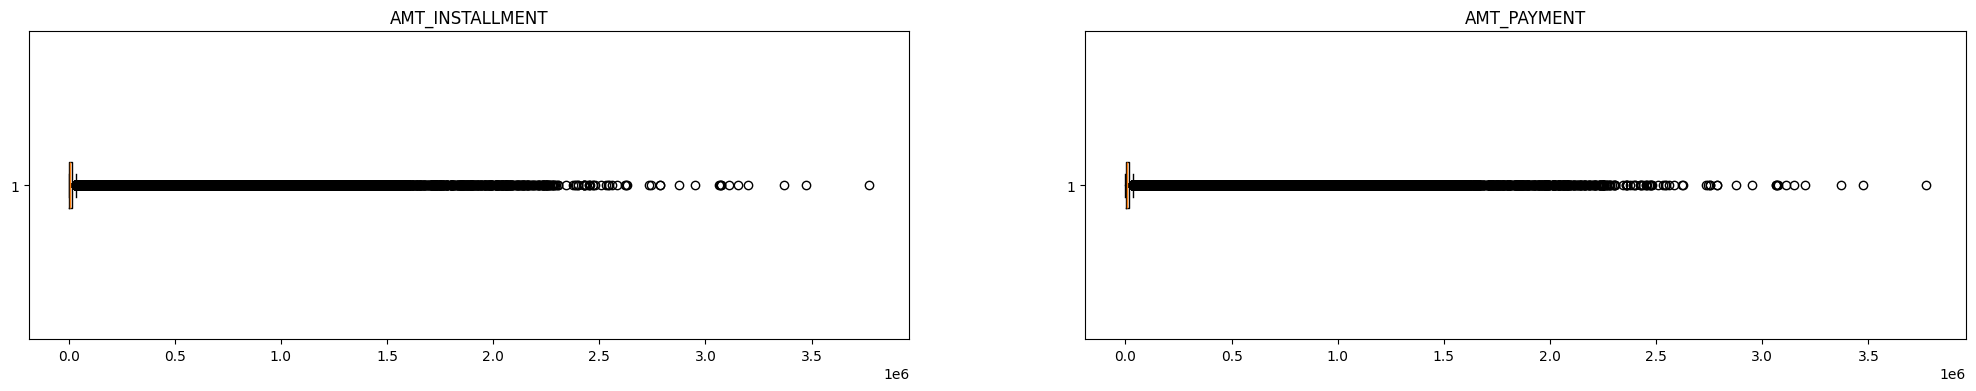

In [59]:
# Draw boxplot to detect if there is any sign of outliers

#The enumerate () function adds a counter to an iterable and returns it in the form of an enumerating object. 
# This enumerated object can then be used directly for loops or converted into a list of tuples using the list() function.


# fig stands for figure object in Matplotlib. It represents the entire figure or canvas where your plots will be drawn.
# axes represents individual subplots in the grid.
# flatten() function returns a copy of the array collapsed into one dimension.
columns = ['AMT_INSTALLMENT','AMT_PAYMENT']
fig, axes = plt.subplots(nrows=math.ceil(len(columns) / 2), ncols = 2, figsize=(25, len(columns) * 2))
axes = axes.flatten()
for i, col in enumerate(columns):
    if i < len(columns):
        without_null = installments_payments[~installments_payments[col].isnull()][col]
        axes[i].boxplot(without_null, vert = False)
        axes[i].set_title(col)
    else:
        break

In [60]:
# Create a function to remove outlier   
def find_outliers(data, whisker_coeff = 1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)                
    IQR = Q3 - Q1                                   
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class RemoveOuliers():
    def __init__(self, whisker_coeff = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None
    def fit(self, X: pd.Series):
        self.lower, self.upper = find_outliers(X, self.whisker)
    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [61]:
# remove outliers in each columns
for col in ['AMT_INSTALLMENT','AMT_PAYMENT']:
    if installments_payments[col].dtype != 'object':
        remove = RemoveOuliers()
        remove.fit(installments_payments[col])
        installments_payments[col] = remove.transform(installments_payments[col])

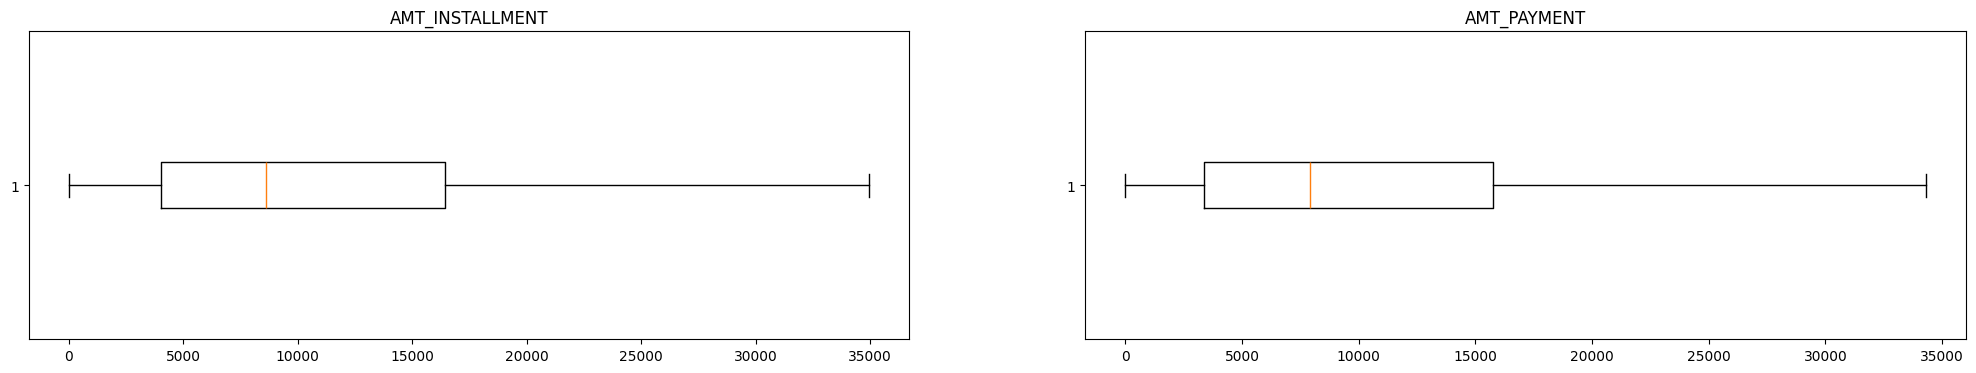

In [62]:
#Redraw boxplot after remove outliers
columns = ['AMT_INSTALLMENT','AMT_PAYMENT']
fig, axes = plt.subplots(nrows = math.ceil(len(columns) / 2), ncols = 2, figsize=(25, len(columns) * 2))
axes = axes.flatten()
for i, col in enumerate(columns):
    if i < len(columns):
        without_null = installments_payments[~installments_payments[col].isnull()][col]
        axes[i].boxplot(without_null, vert = False)
        axes[i].set_title(col)
    else:
        break

In [63]:
# Percentage of null values in each columns
installments_payments.count() / len(installments_payments) * 100

SK_ID_PREV                 100.000000
NUM_INSTALLMENT_VERSION    100.000000
NUM_INSTALMENT_NUMBER      100.000000
DAYS_INSTALLMENT           100.000000
DAYS_ENTRY_PAYMENT          99.978837
AMT_INSTALLMENT             99.999987
AMT_PAYMENT                 99.978837
SK_ID_CURR                  99.999987
dtype: float64